# Proyecto Final Python (Samsung Innovation Campus)

### Participantes del Grupo

- Haroldy Martinez
- Milton García
- Erick
- Madeline Pérez
- Sebastian Espinal

### Informacion del Grupo:

- Nombre: Tropicoders.py
- Titulo del proyecto: Análisis de criptomonedas en El Salvador
- Tipo de proyecto: Análisis de Criptomonedas
- Fecha limite de entrega: Jueves 21/03/2024
- Grupo de WhatsApp: https://chat.whatsapp.com/H9tHm7QtLtRC1kmbqINoqo


# Inicio del proyecto

#### Carga de datos en dataframes

In [ ]:
import pandas as pd;

# Las monedas a utilizar en el estudio
cardano = pd.read_csv("cardano.csv")
binancecoin = pd.read_csv("binancecoin.csv")
bitcoin = pd.read_csv("bitcoin.csv")
ethereum = pd.read_csv("ethereum.csv")
solana = pd.read_csv("solana.csv")

# Uniendo los dataframe en uno solo, con todas las monedas
data = pd.concat([cardano, binancecoin, bitcoin, ethereum, solana])

data.rename(columns = {"price": "PRECIO", "total_volume" : "CANT. DE TRANSACCIONES", "market_cap": "CAPITALIZACION DE MERCADO", "coin_name" : "MONEDA"}, inplace = True)

# Cambiando la fecha a datetime y entonces modificando como se muestra en dia/mes/año
data["date"] = pd.to_datetime(data["date"])
data["date"] = data["date"].dt.strftime("%d/%m/%Y")

# Tomando la columna de fecha como indice
data.set_index("date", inplace = True)
data.index.name = "FECHA"

data.head()

# data.info()

# -------------------------------------------------------
# agrupando = data.groupby(["MONEDA"]).mean()
# agrupando2 = data.groupby(["MONEDA", "date"]).mean()
# agrupando2.head(30)

,PRECIO,CANT. DE TRANSACCIONES,CAPITALIZACION DE MERCADO,MONEDA
FECHA,,,,
18/10/2017,0.026845,2.351678e+06,6.960214e+08,cardano
19/10/2017,0.026830,2.815156e+06,6.956220e+08,cardano
20/10/2017,0.030300,8.883473e+06,7.855800e+08,cardano
21/10/2017,0.028588,5.308857e+06,7.412021e+08,cardano
22/10/2017,0.027796,2.901876e+06,7.206698e+08,cardano


### Limpieza de datos

In [ ]:
#Buscar la data nula
#data.isnull()

#Borrar la data nula
#data.dropna(how='all')

#cambiar a decimales o enteros dependiendo la columna y redondeo

# Cambio a decimales (precio)
data['PRECIO'] = data['PRECIO'].round(3)
data['PRECIO'] = data['PRECIO'].astype(float)

# Cambio a decimales (CAPITALIZACION DE MERCADO)
data['CAPITALIZACION DE MERCADO'] = data['CAPITALIZACION DE MERCADO'].round(5)
data['CAPITALIZACION DE MERCADO'] = data['CAPITALIZACION DE MERCADO'].astype(float)

# Cambio a entero
data['CANT. DE TRANSACCIONES'] = data['CANT. DE TRANSACCIONES'].astype(int)

#data.head()

#Index a mayusculas
data.index.str.upper()

#Agrupando datos por moneda y valor
data.groupby('MONEDA')

grupos = data.groupby('MONEDA')

for coins, grupo in grupos:
    print("Grupo:", coins )
    grupoordenado = grupo.sort_values(by='PRECIO', ascending=True)
    print(grupo)
    print("************************************************************************")

Grupo: binancecoin
             PRECIO  CANT. DE TRANSACCIONES  CAPITALIZACION DE MERCADO  \
FECHA                                                                    
16/09/2017    0.107                       1               1.072506e+07   
17/09/2017    0.154                      14               1.540413e+07   
18/09/2017    0.173                       6               1.734912e+07   
19/09/2017    0.168                       3               1.683342e+07   
20/09/2017    0.167                      40               1.666279e+07   
...             ...                     ...                        ...   
14/03/2024  628.454              7835799279               9.612280e+10   
15/03/2024  603.266              6486341765               9.286088e+10   
16/03/2024  621.657              7438316979               9.533214e+10   
17/03/2024  575.438              4873020293               8.838251e+10   
18/03/2024  572.030              4260820679               8.742917e+10   

                 M

### Graficos de analisis de las criptomonedas

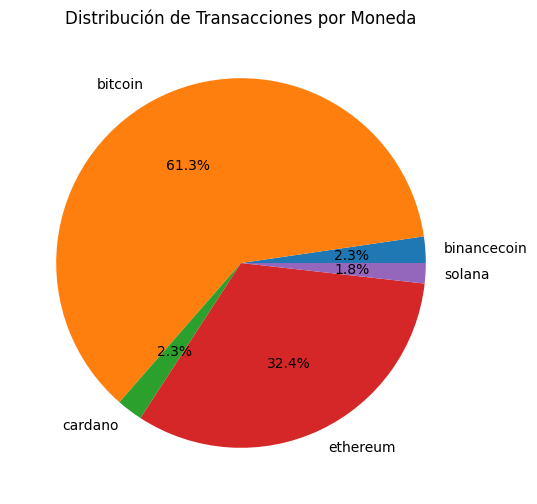

In [ ]:
import matplotlib.pyplot as plt

transacciones_por_moneda = data.groupby('MONEDA')['CANT. DE TRANSACCIONES'].sum()

plt.figure(figsize=(10, 6))
plt.pie(transacciones_por_moneda, labels = transacciones_por_moneda.index, autopct='%1.1f%%')
plt.title('Distribución de Transacciones por Moneda')
plt.show()

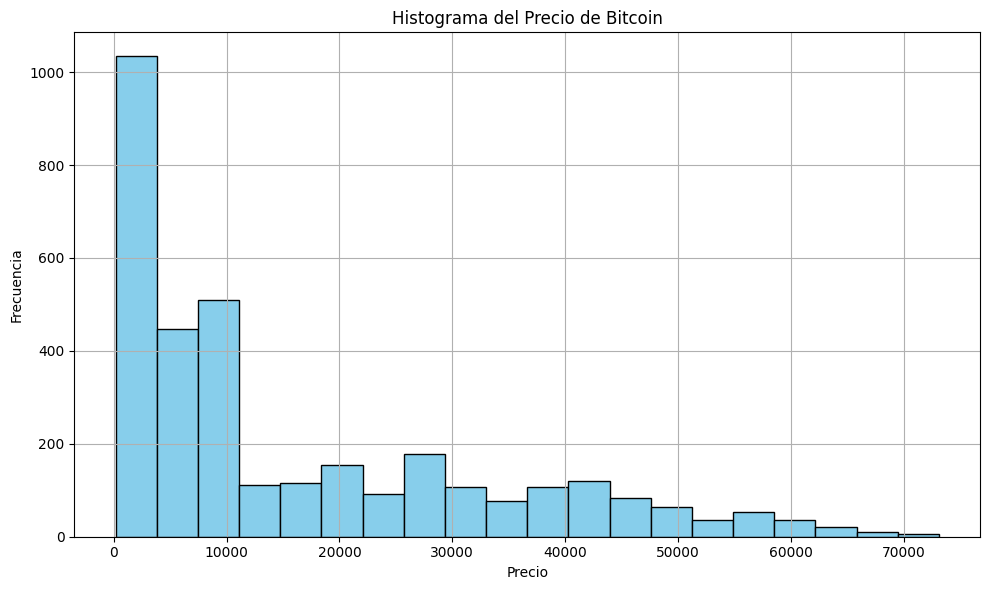

In [ ]:
import matplotlib.pyplot as plt

bitcoin_data = data[data['MONEDA'] == 'bitcoin']

plt.figure(figsize=(10, 6))
plt.hist(bitcoin_data['PRECIO'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma del Precio de Bitcoin')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-46-4de749f1537b>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["FECHA"] = pd.to_datetime(data["FECHA"])


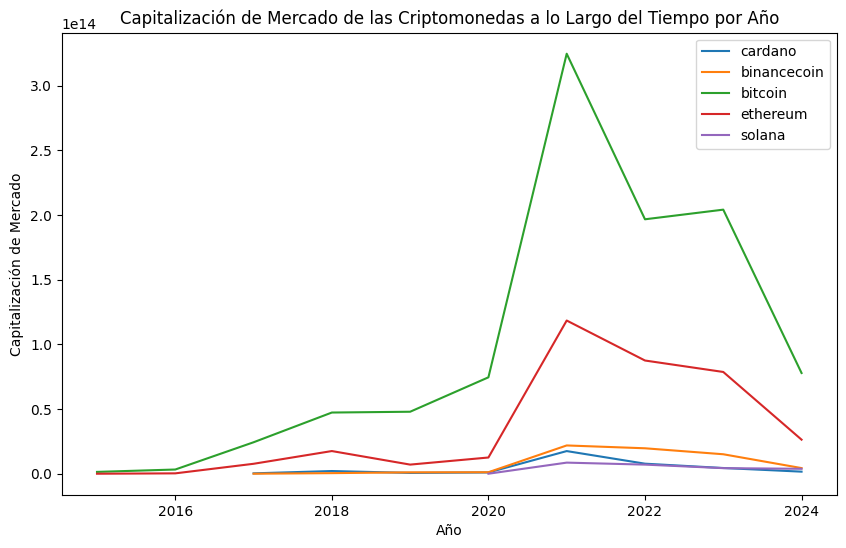

In [ ]:
data.reset_index(inplace=True)
# Cambiando la fecha a datetime y extrayendo el año
data["FECHA"] = pd.to_datetime(data["FECHA"])
data["AÑO"] = data["FECHA"].dt.year

# Agrupar los datos por moneda y año, y sumar la capitalización de mercado
cap_mercado_por_año = data.groupby(['MONEDA', 'AÑO'])['CAPITALIZACION DE MERCADO'].sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))

for moneda in data['MONEDA'].unique():
    plt.plot(cap_mercado_por_año[moneda].index, cap_mercado_por_año[moneda].values, label=moneda)

plt.title('Capitalización de Mercado de las Criptomonedas a lo Largo del Tiempo por Año')
plt.xlabel('Año')
plt.ylabel('Capitalización de Mercado')
plt.legend()
plt.show()

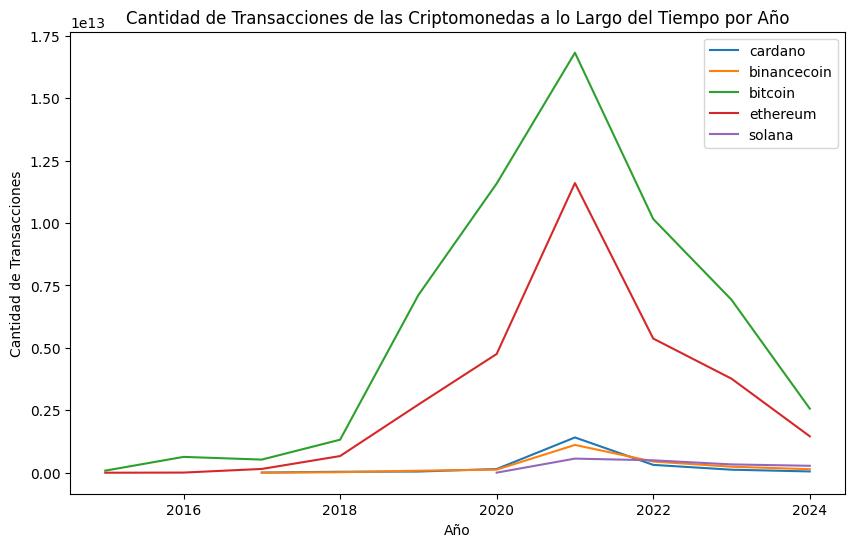

In [ ]:
data["FECHA"] = pd.to_datetime(data["FECHA"])
data["AÑO"] = data["FECHA"].dt.year

transacciones_por_año = data.groupby(['MONEDA', 'AÑO'])['CANT. DE TRANSACCIONES'].sum()

plt.figure(figsize=(10, 6))

for moneda in data['MONEDA'].unique():
    plt.plot(transacciones_por_año[moneda].index, transacciones_por_año[moneda].values, label=moneda)

plt.title('Cantidad de Transacciones de las Criptomonedas a lo Largo del Tiempo por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Transacciones')
plt.legend()
plt.show()

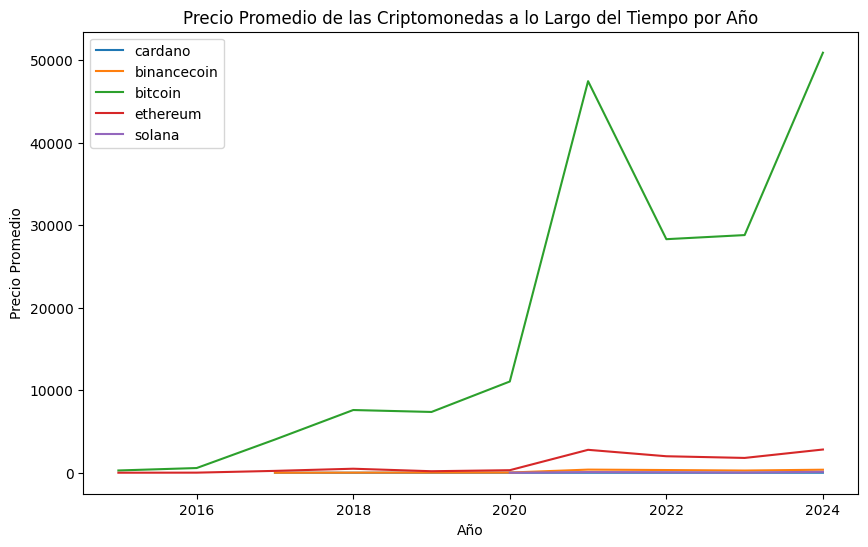

In [ ]:
# Cambiando la fecha a datetime y extrayendo el año
data["FECHA"] = pd.to_datetime(data["FECHA"])
data["AÑO"] = data["FECHA"].dt.year

# Agrupar los datos por moneda y año, y calcular el precio promedio
precio_promedio_por_año = data.groupby(['MONEDA', 'AÑO'])['PRECIO'].mean()

# Crear el gráfico
plt.figure(figsize=(10, 6))

for moneda in data['MONEDA'].unique():
    plt.plot(precio_promedio_por_año[moneda].index, precio_promedio_por_año[moneda].values, label=moneda)

plt.title('Precio Promedio de las Criptomonedas a lo Largo del Tiempo por Año')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.legend()
plt.show()

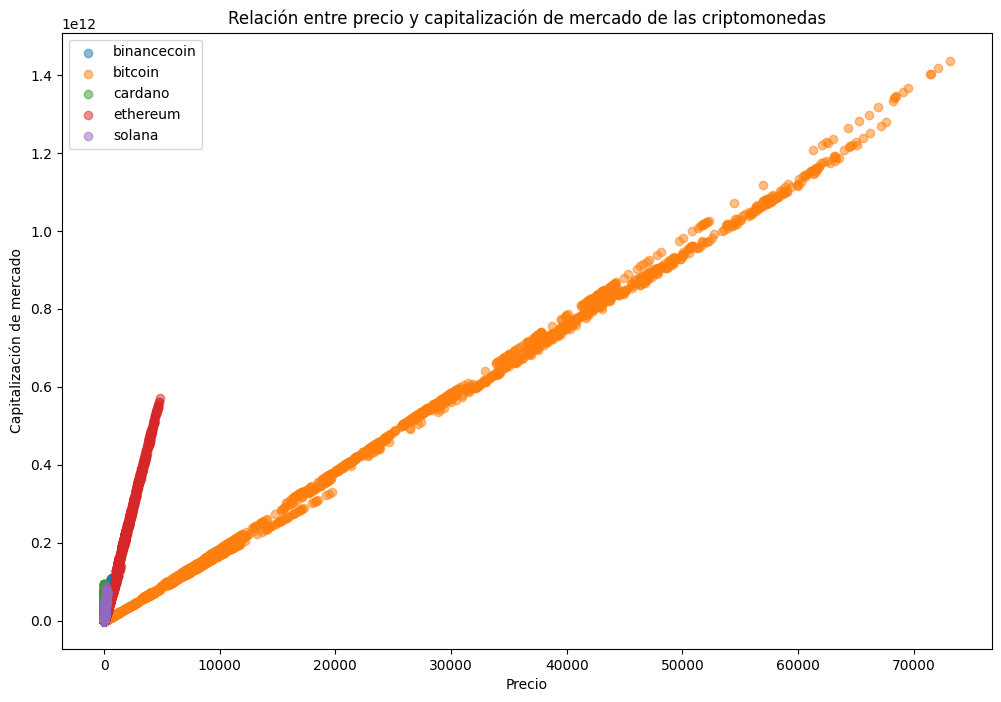

In [ ]:
plt.figure(figsize=(12, 8))
for coin, grupo in grupos:
    plt.scatter(grupo['PRECIO'], grupo['CAPITALIZACION DE MERCADO'], label=coin, alpha=0.5)
plt.xlabel('Precio')
plt.ylabel('Capitalización de mercado')
plt.title('Relación entre precio y capitalización de mercado de las criptomonedas')
plt.legend()
plt.show()

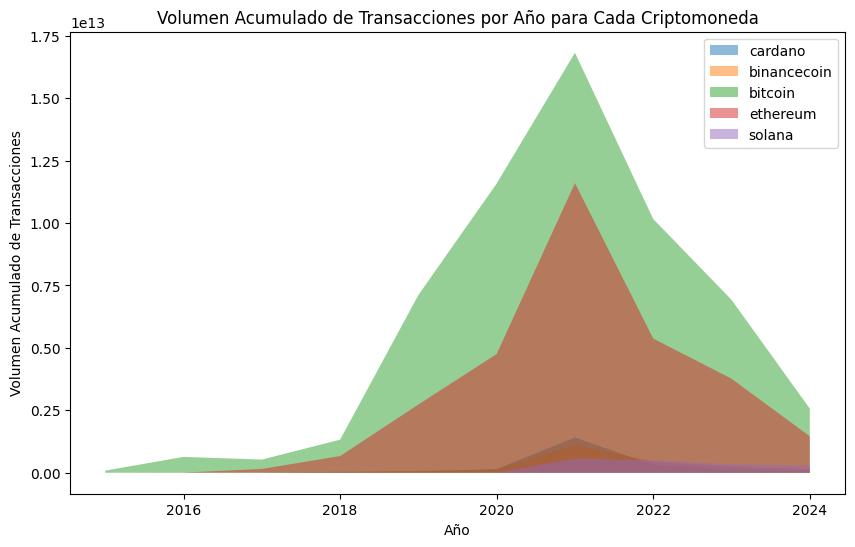

In [ ]:
import matplotlib.pyplot as plt

# Cambiando la fecha a datetime y extrayendo el año
data["FECHA"] = pd.to_datetime(data["FECHA"])
data["AÑO"] = data["FECHA"].dt.year

# Agrupar los datos por moneda y año, y sumar las transacciones
transacciones_por_año = data.groupby(['MONEDA', 'AÑO'])['CANT. DE TRANSACCIONES'].sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))

for moneda in data['MONEDA'].unique():
    plt.fill_between(transacciones_por_año[moneda].index, transacciones_por_año[moneda].values, label=moneda, alpha=0.5)

plt.title('Volumen Acumulado de Transacciones por Año para Cada Criptomoneda')
plt.xlabel('Año')
plt.ylabel('Volumen Acumulado de Transacciones')
plt.legend()
plt.show()

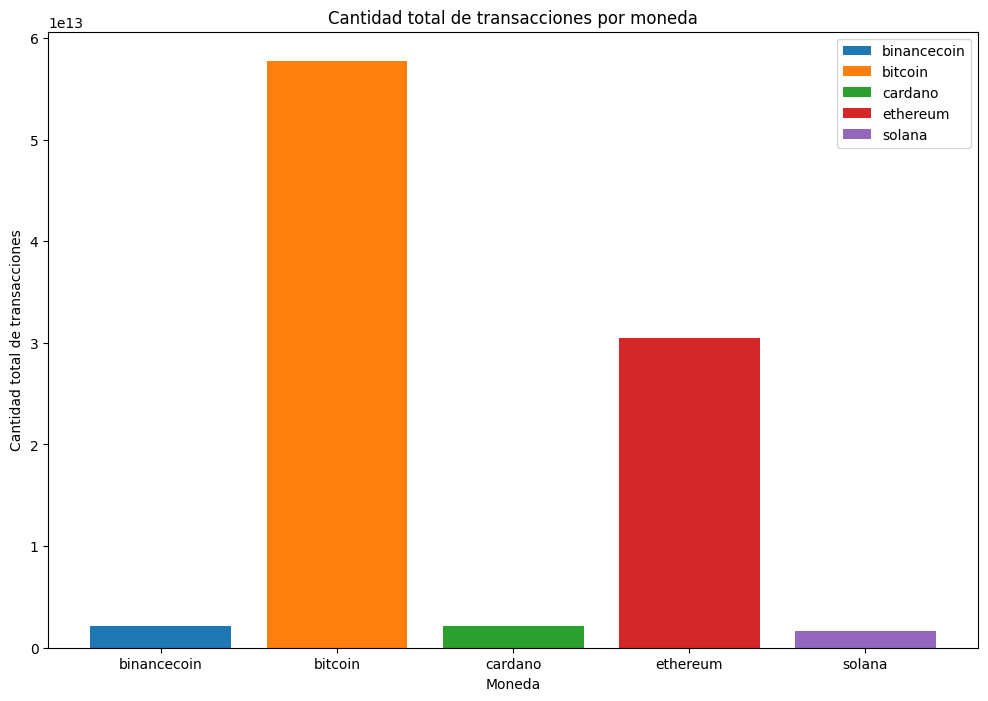

In [ ]:
# Gráfico de barras de la cantidad total de transacciones por moneda
plt.figure(figsize=(12, 8))
for coin, grupo in grupos:
    plt.bar(coin, grupo['CANT. DE TRANSACCIONES'].sum(), label=coin)
plt.xlabel('Moneda')
plt.ylabel('Cantidad total de transacciones')
plt.title('Cantidad total de transacciones por moneda')
plt.legend()
plt.show()

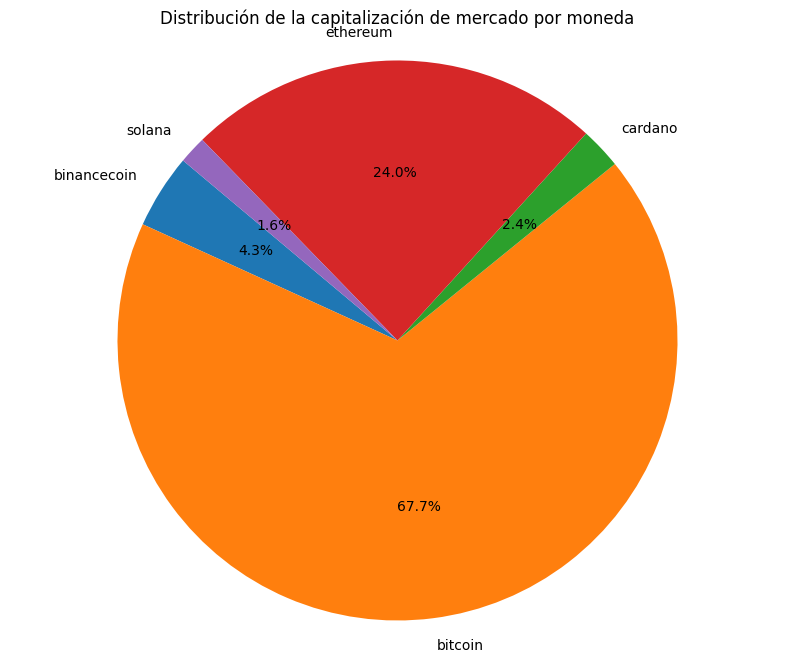

In [ ]:
# Gráfico de pastel de la distribución de la capitalización de mercado por moneda
plt.figure(figsize=(10, 8))
total_capitalizacion = data.groupby('MONEDA')['CAPITALIZACION DE MERCADO'].sum()
plt.pie(total_capitalizacion, labels=total_capitalizacion.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de la capitalización de mercado por moneda')
plt.show()

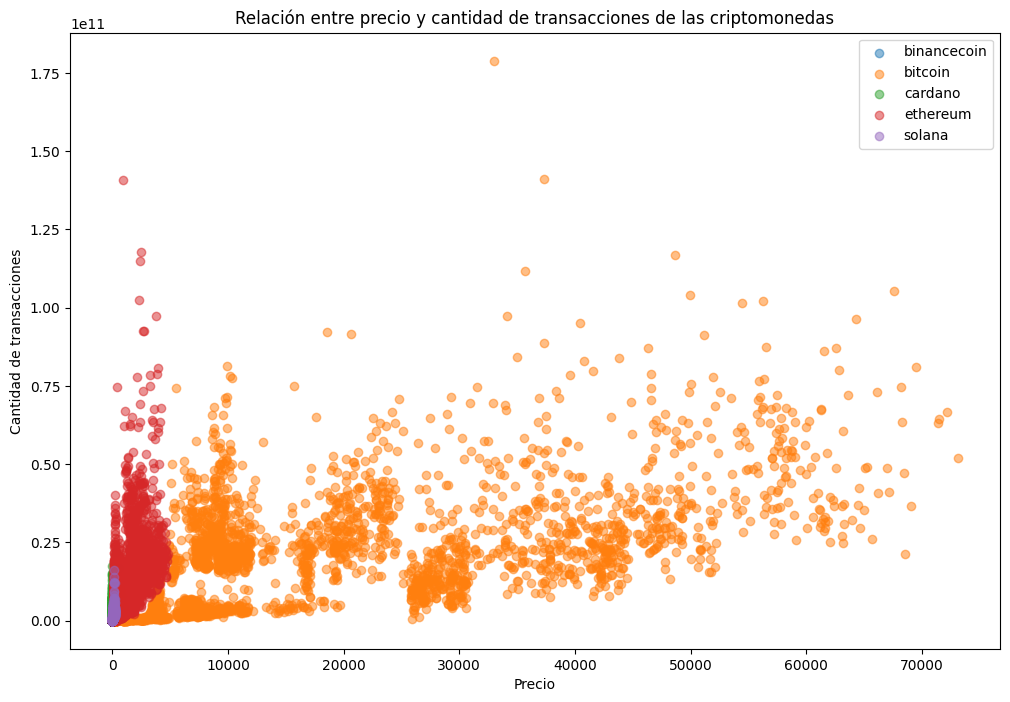

In [ ]:
# Gráfico de dispersión de precios vs. volumen de transacciones para cada moneda
plt.figure(figsize=(12, 8))
for coin, grupo in grupos:
    plt.scatter(grupo['PRECIO'], grupo['CANT. DE TRANSACCIONES'], label=coin, alpha=0.5)
plt.xlabel('Precio')
plt.ylabel('Cantidad de transacciones')
plt.title('Relación entre precio y cantidad de transacciones de las criptomonedas')
plt.legend()
plt.show()

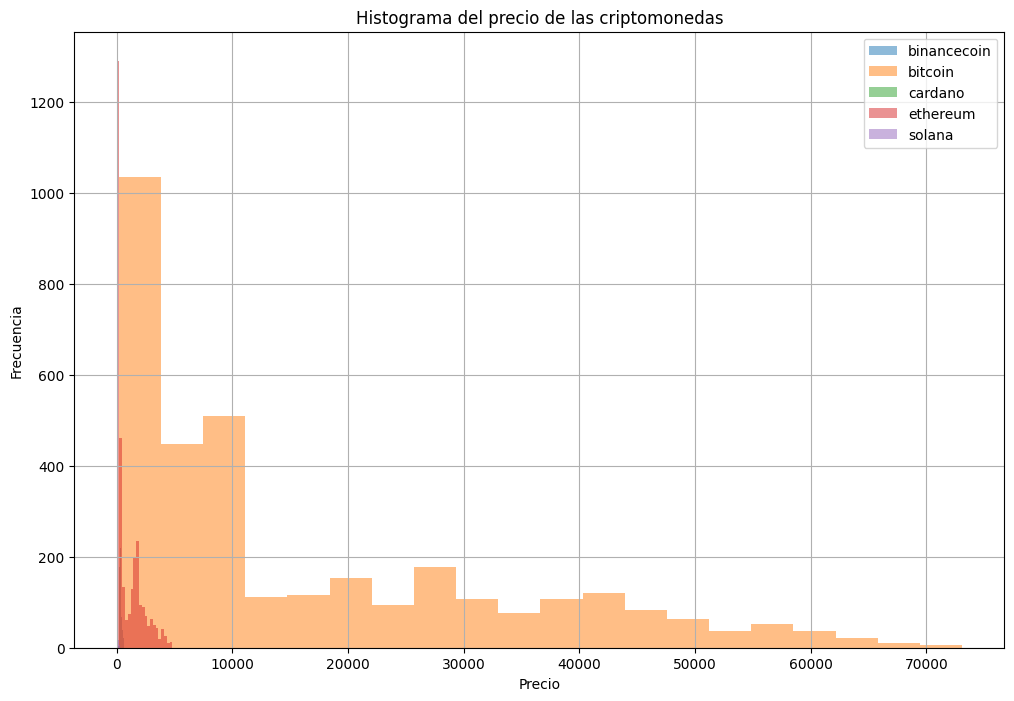

In [ ]:
# Histograma del precio de las criptomonedas
plt.figure(figsize=(12, 8))
for coin, grupo in grupos:
    plt.hist(grupo['PRECIO'], bins=20, alpha=0.5, label=coin)

plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma del precio de las criptomonedas')
plt.legend()
plt.grid(True)
plt.show()

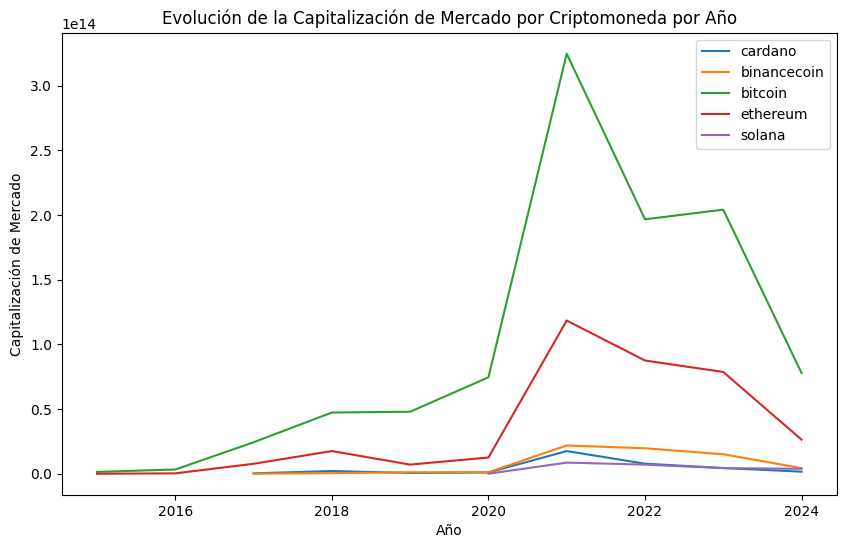

In [ ]:
# Cambiando la fecha a datetime y extrayendo el año
data["FECHA"] = pd.to_datetime(data["FECHA"])
data["AÑO"] = data["FECHA"].dt.year

# Agrupar los datos por moneda y año, y sumar la capitalización de mercado
cap_mercado_por_año = data.groupby(['MONEDA', 'AÑO'])['CAPITALIZACION DE MERCADO'].sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))

for moneda in data['MONEDA'].unique():
    plt.plot(cap_mercado_por_año[moneda].index, cap_mercado_por_año[moneda].values, label=moneda)

plt.title('Evolución de la Capitalización de Mercado por Criptomoneda por Año')
plt.xlabel('Año')
plt.ylabel('Capitalización de Mercado')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV en un DataFrame
pib_salvador = pd.read_csv("pib.csv")
pib_salvador.isnull()

# Mostrar las primeras filas del DataFrame
#print(pib_salvador.head())

# Convertir la columna 'FECHA' a tipo datetime para ordenar los datos correctamente
pib_salvador['FECHA'] = pd.to_datetime(pib_salvador['FECHA'], format='%Y')

# Ordenar los datos por fecha
pib_salvador = pib_salvador.sort_values(by='FECHA')

print(pib_salvador)

           PAIS      FECHA  PIB CRECIMIENTO          PIB NOMINAL
0   El Salvador 2015-01-01             2.40  $23,438,240,000.00 
1   El Salvador 2016-01-01             2.54  $24,191,430,000.00 
2   El Salvador 2017-01-01             2.29  $24,979,190,000.00 
3   El Salvador 2018-01-01             2.42  $26,020,850,000.00 
4   El Salvador 2019-01-01             2.36  $26,881,140,000.00 
5   El Salvador 2020-01-01            -7.82  $24,930,080,000.00 
6   El Salvador 2021-01-01            11.18  $29,451,240,000.00 
7   El Salvador 2022-01-01             2.60  $32,488,720,000.00 
8           NaN        NaT              NaN                  NaN
9           NaN        NaT              NaN                  NaN
10          NaN        NaT              NaN                  NaN
11          NaN        NaT              NaN                  NaN
12          NaN        NaT              NaN                  NaN
13          NaN        NaT              NaN                  NaN
14          NaN        Na

### Graficos PIB del Salvador

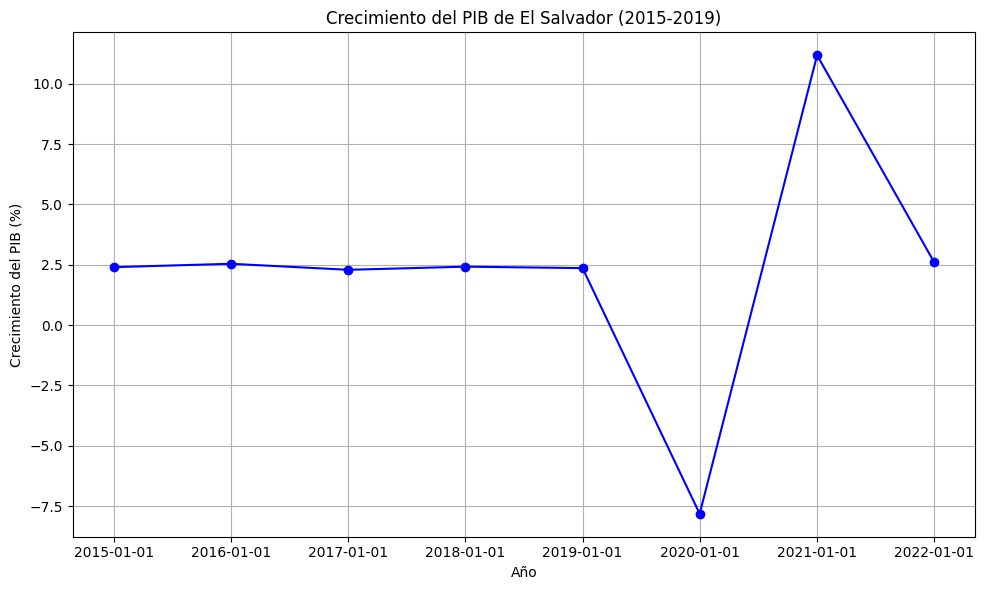

In [ ]:
# Gráfico de línea para mostrar el crecimiento del PIB a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(pib_salvador['FECHA'], pib_salvador['PIB CRECIMIENTO'], marker='o', color='b')
plt.title('Crecimiento del PIB de El Salvador (2015-2019)')
plt.xlabel('Año')
plt.ylabel('Crecimiento del PIB (%)')
plt.grid(True)

# Filtrar los valores NaN antes de establecer los ticks
filtered_dates = pib_salvador['FECHA'].dropna()
plt.xticks(filtered_dates)

plt.tight_layout()
plt.show()

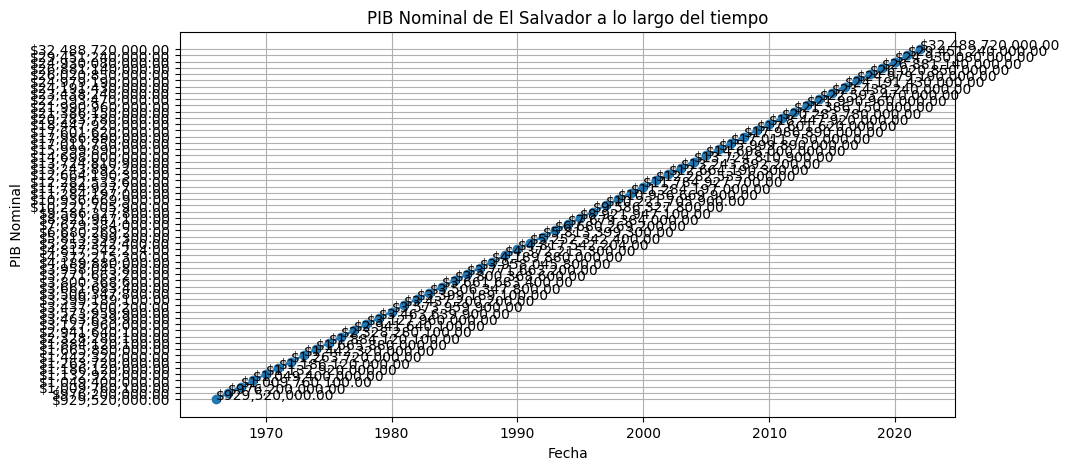

In [58]:
plt.figure(figsize=(10,5))
plt.plot(pib_salvador['FECHA'], pib_salvador['PIB NOMINAL'], marker='o')
plt.title('PIB Nominal de El Salvador a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('PIB Nominal')

# Añadir anotaciones con las cantidades del PIB nominal
for i in range(len(pib_salvador)):
    plt.annotate(pib_salvador['PIB NOMINAL'].iloc[i], (pib_salvador['FECHA'].iloc[i], pib_salvador['PIB NOMINAL'].iloc[i]))

plt.grid(True)
plt.show()

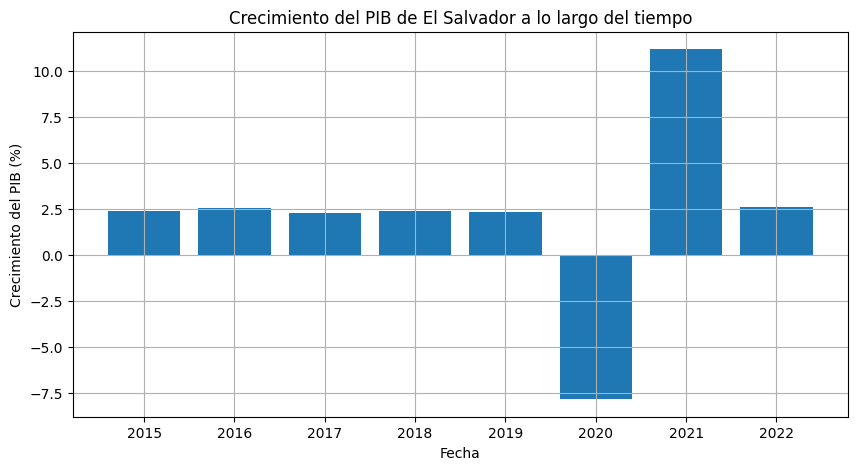

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(pib_salvador['FECHA'].dt.year, pib_salvador['PIB CRECIMIENTO'])
plt.title('Crecimiento del PIB de El Salvador a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Crecimiento del PIB (%)')
plt.grid(True)
plt.show()

### Analisis generales de los datos

In [59]:
# Cargar los datos de cada criptomoneda
binancecoin_data = pd.read_csv("binancecoin.csv")
bitcoin_data = pd.read_csv("bitcoin.csv")
cardano_data = pd.read_csv("cardano.csv")
ethereum_data = pd.read_csv("ethereum.csv")
solana_data = pd.read_csv("solana.csv")

# Concatenar los datos de todas las criptomonedas en un solo DataFrame
crypto_data = pd.concat([binancecoin_data, bitcoin_data, cardano_data, ethereum_data, solana_data])

# Convertir la columna 'date' a tipo datetime usando el formato adecuado
crypto_data['date'] = pd.to_datetime(crypto_data['date'], format='%Y-%m-%d', errors='coerce').dt.strftime('%Y-%m-%d') + ' 00:00:00'

# Paso 1: Determinar las criptomonedas que están por encima de la media
media_valor_mercado = crypto_data['market_cap'].mean()
criptomonedas_por_encima_media = crypto_data[crypto_data['market_cap'] > media_valor_mercado]

# Paso 2: En los últimos tres meses del año 2015, determinar las criptomonedas que tuvieron un mayor valor en el mercado
ultimos_tres_meses_2015 = crypto_data[(crypto_data['date'] >= '2015-10-01') & (crypto_data['date'] <= '2015-12-31')]
criptomonedas_mayor_valor_2015 = ultimos_tres_meses_2015.sort_values(by='market_cap', ascending=False).head(1)

# Paso 3: Determinar la moneda más volátil en el 2015
volatilidad_por_moneda = crypto_data.groupby('coin_name')['price'].std().sort_values(ascending=False)
moneda_mas_volatil = volatilidad_por_moneda.idxmax()

# Paso 4: Determinar la moneda más estable en el 2015
moneda_mas_estable = volatilidad_por_moneda.idxmin()

# Resultados
print("Criptomonedas por encima de la media:")
print(criptomonedas_por_encima_media[['coin_name', 'market_cap']])
print("\nCriptomoneda con mayor valor en los últimos tres meses del año 2015:")
print(criptomonedas_mayor_valor_2015[['coin_name', 'market_cap']])
print("\nMoneda más volátil en el 2015:", moneda_mas_volatil)
print("\nMoneda más estable en el 2015:", moneda_mas_estable)

Criptomonedas por encima de la media:
     coin_name    market_cap
1035   bitcoin  1.176215e+11
1036   bitcoin  1.205467e+11
1037   bitcoin  1.231547e+11
1038   bitcoin  1.235968e+11
1039   bitcoin  1.183888e+11
...        ...           ...
3141  ethereum  4.809894e+11
3142  ethereum  4.655176e+11
3143  ethereum  4.492210e+11
3144  ethereum  4.220067e+11
3145  ethereum  4.373980e+11

[3173 rows x 2 columns]

Criptomoneda con mayor valor en los últimos tres meses del año 2015:
    coin_name    market_cap
347   bitcoin  6.958908e+09

Moneda más volátil en el 2015: bitcoin

Moneda más estable en el 2015: cardano
